<a href="https://colab.research.google.com/github/Nikita2397/Python-Notebooks/blob/main/CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

###### @author - Nikita Arora
###### @email - nikitarora.21@gmail.com
###### @date 1st August 2021

## Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

###### Splitting data into train and test set

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

## Data Exploration

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

###### Plotting the images

In [10]:
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

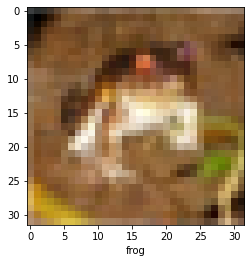

In [11]:
plot_sample(X_train, y_train, 0)


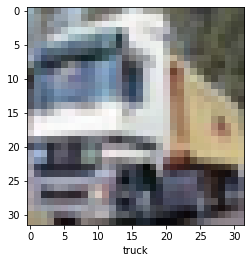

In [12]:
plot_sample(X_train, y_train, 1)


###### Normalizing Data

In [13]:

X_train = X_train / 255.0
X_test = X_test / 255.0

## Network A
###### The first neural network will be the simplest, in that it has no hidden layers. It should take the image and flatten it to a vector for the input, and then have 10 outputs, one for each class.
###### There should be no non-linearities for this network and is just a very simple linear classifier.

In [14]:
net_a = models.Sequential([
  layers.Flatten(input_shape=(32,32,3)),
  layers.Dense(10, activation='sigmoid')
])

net_a.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=[ 'accuracy'])

history_a = net_a.fit(X_train, y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9461 - accuracy: 0.3041
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8459 - accuracy: 0.3503
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8155 - accuracy: 0.3625
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7966 - accuracy: 0.3732
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7842 - accuracy: 0.3753
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7723 - accuracy: 0.3817
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7663 - accuracy: 0.3854
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7597 - accuracy: 0.3865
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7510 - accuracy: 0.3933
Epoch 10/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.745

In [15]:
y_pred = net_a.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.37      0.43      1000
           1       0.61      0.34      0.44      1000
           2       0.40      0.05      0.09      1000
           3       0.27      0.19      0.22      1000
           4       0.38      0.22      0.28      1000
           5       0.27      0.43      0.34      1000
           6       0.38      0.52      0.44      1000
           7       0.29      0.62      0.40      1000
           8       0.58      0.40      0.47      1000
           9       0.38      0.59      0.46      1000

    accuracy                           0.37     10000
   macro avg       0.41      0.37      0.36     10000
weighted avg       0.41      0.37      0.36     10000



## Network B
###### The second neural network will be slightly more complicated in that it has a hidden layer with 300 nodes and adds a non-linearity between the layers. It should use the following operations in this order:
<li> Flatten the image to a vector for the input
<li> Use a fully-connected linear layer with 300 hidden-neurons
<li> Use the ReLU activation function
<li> Use a fully-connected linear layer to the 10 outputs.


In [16]:
net_b = models.Sequential([
  layers.Flatten(input_shape=(32,32,3)),
  layers.Dense(300, activation='relu'),
  layers.Dense(10, activation='sigmoid')
])

net_b.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=[ 'accuracy'])

history_b = net_b.fit(X_train, y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8770 - accuracy: 0.3293
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6955 - accuracy: 0.4036
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6206 - accuracy: 0.4288
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5686 - accuracy: 0.4488
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5260 - accuracy: 0.4642
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4933 - accuracy: 0.4758
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4646 - accuracy: 0.4851
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4365 - accuracy: 0.4956
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4117 - accuracy: 0.5041
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.391

In [17]:
y_pred = net_b.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.58      0.60      1000
           1       0.67      0.61      0.64      1000
           2       0.33      0.60      0.42      1000
           3       0.37      0.33      0.35      1000
           4       0.68      0.17      0.27      1000
           5       0.57      0.24      0.34      1000
           6       0.47      0.75      0.57      1000
           7       0.56      0.62      0.59      1000
           8       0.62      0.69      0.65      1000
           9       0.62      0.57      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.55      0.52      0.50     10000
weighted avg       0.55      0.52      0.50     10000



## Network C
###### This third neural network will be a convolutional neural network. It should use the following operations in this order:

<li>Use a convolution layer with kernel-width 5 and depth 25
<li>Use the ReLU activation function
<li>Use a max-pool operation with kernel-width 2 and stride 2
<li>Flatten the image to a vector for the next step's input
<li>Use a fully-connected linear layer to the 10 outputs.


In [18]:
net_c = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=25, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [19]:

net_c.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history_c = net_c.fit(X_train, y_train, epochs=50)


Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5876 - accuracy: 0.4261
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3045 - accuracy: 0.5384
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1891 - accuracy: 0.5815
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1077 - accuracy: 0.6121
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0471 - accuracy: 0.6349
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0035 - accuracy: 0.6513
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9695 - accuracy: 0.6610
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9401 - accuracy: 0.6725
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9187 - accuracy: 0.6838
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.896

In [21]:
net_c.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0422 - accuracy: 0.6743


[1.042162537574768, 0.6743000149726868]

#### Testing on Test Set

In [22]:
y_pred = net_c.predict(X_test)
y_pred[:5]

array([[5.17416338e-05, 2.29547027e-06, 3.80074962e-05, 9.81483042e-01,
        1.34184083e-05, 1.31342765e-02, 1.10851019e-03, 3.10316886e-04,
        3.82287754e-03, 3.54553049e-05],
       [3.94561619e-01, 1.66540425e-02, 9.99041460e-03, 7.14238442e-04,
        8.28689517e-05, 3.22646002e-07, 4.40241944e-04, 1.05742572e-07,
        5.65278947e-01, 1.22772884e-02],
       [2.58493602e-01, 1.52865678e-01, 1.79675501e-02, 3.46287177e-03,
        1.07179862e-03, 4.02264239e-04, 1.23506458e-03, 1.36072049e-02,
        4.55757558e-01, 9.51363444e-02],
       [9.11924660e-01, 2.26307521e-03, 2.48582312e-03, 3.20818253e-05,
        1.42258214e-04, 8.53088977e-07, 6.89982844e-05, 9.17932448e-06,
        8.25828910e-02, 4.90028237e-04],
       [8.61966676e-09, 1.09096101e-08, 2.29462457e-04, 1.98285154e-04,
        1.89416879e-03, 1.35300697e-05, 9.97664452e-01, 7.10657755e-09,
        1.28137629e-07, 2.78350654e-09]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

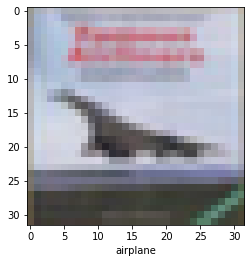

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

In [27]:
nets = [net_a, net_b, net_c]
histories = []


In [28]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

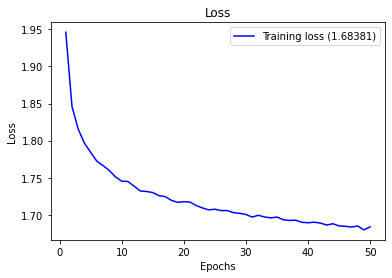

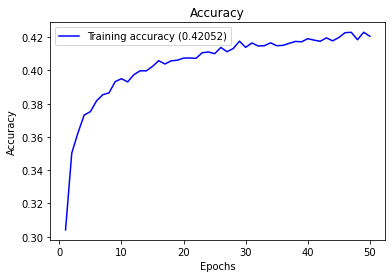

In [29]:
plot_history(history_a)

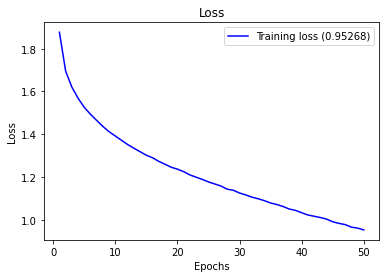

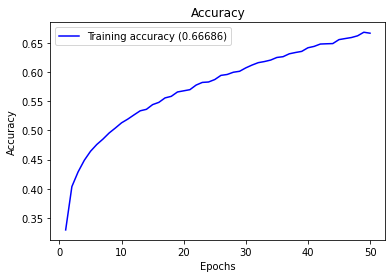

In [30]:
plot_history(history_b)

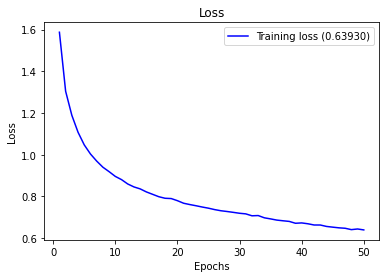

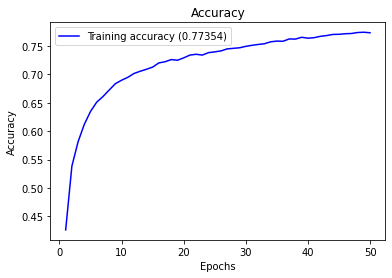

In [31]:
plot_history(history_c)